<h1 style='black'>Часть 1: поворот квадрата.</h1>

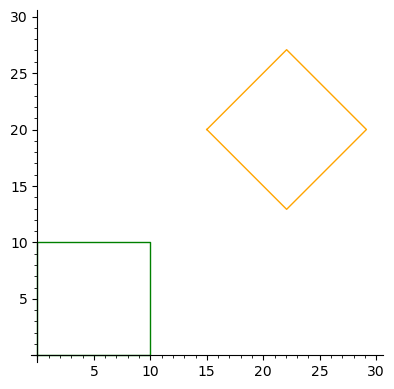

In [69]:
a = 10
alpha = math.radians(45)
shiftX = 15
shiftY = 20
matr1 = matrix([[0, 0], [0, a], [a, a], [a, 0], [0, 0]])
rotation = matrix([[cos(alpha), -sin(alpha)],[sin(alpha), cos(alpha)]])
shift = matrix([[shiftX, shiftY], [shiftX, shiftY], [shiftX, shiftY], [shiftX, shiftY], [shiftX, shiftY]])
res = matr1 * rotation + shift
show(line(matr1, color = 'green') + line(res, color = 'orange'), xmin = 0, xmax = 30, ymin = 0, ymax = 30, aspect_ratio = 1)

<h1>Часть 2: исследование функции.</h1>
Для заданной формулой функции найти:
<ol>
    <li>Область определения функции.</li>
    <li>Является ли функция четной или нечетной, является ли периодической.</li>
    <li>Точки пересечения графика с осями координат.</li>
    <li>Промежутки знакопостоянства.</li>
    <li>Промежутки возрастания и убывания.</li>
    <li>Точки экстремума и значения в этих точках.</li>
    <li>Непрерывность. Наличие точек разрыва и их классификация.</li>
    <li>Асимптоты.</li>
</ol>


In [2]:
var("x T")
y = real_nth_root((x^3 - x^2 - x + 1), 3) * cot(x)
show(y)

cot(x)*real_nth_root(x^3 - x^2 - x + 1, 3)

Вариант 4: $y = \frac{(x^3 - x^2 - x + 1)^{\frac{1}{3}}}{tg(x)}$

<h5> График функции </h5>

In [0]:
График заданной функции на 

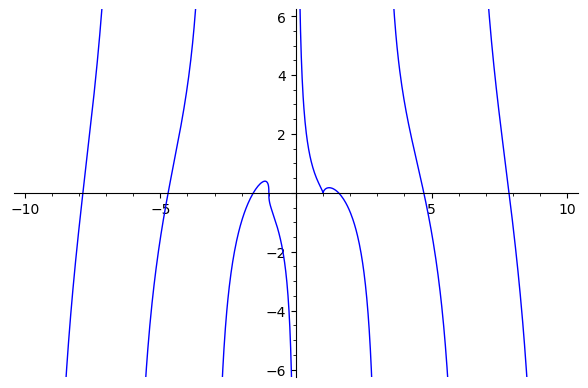

In [10]:
graph = plot(y, (-10, 10), ymin = -6, ymax = 6, exclude = [-3* pi, -2* pi, -pi, 0, pi, 2 * pi, 3 * pi])
show(graph)

<h5>1. Область определения.</h5>

In [31]:
# sin(x) != 0, следовательно

Функция определена на всей числовой оси, кроме точек $x = \pi * n$, где $n \in Z$

<h5>2. Проверка четности, периодичности.</h5>

In [32]:
if ((y(x) - y(-x)).expand().simplify() == 0):
    print("Функция является чётной.")
elif ((y(x) + y(-x)).expand().simplify() == 0):
    print("Функция является нечётной.")
else:
    print("Функция не является ни четной, ни нечетной.")

Функция не является ни четной, ни нечетной.


In [92]:
var("T")
eq = y(x) - y(x + T)
solve(eq, T)

[tan(T + x) == (T^3 + (3*T - 1)*x^2 + x^3 - T^2 + (3*T^2 - 2*T - 1)*x - T + 1)^(1/3)*tan(x)/(x^3 - x^2 - x + 1)^(1/3)]

Решений нет, значит, функция не является периодической.


<h5>3. Точки пересечения графика функции с осями координат.</h5>

Из уравнения $y(x) = 0$ находим точки пересечения оси $Ox$.

In [131]:
solve(cot(x) == 0, x, to_poly_solve = 'force')

[x == 1/2*pi + pi*z225836]

In [33]:
ch = x^3 - x^2 - x + 1
solve(ch == 0, x)

[x == -1, x == 1]

Таким образом, график пересекает ось $Ox$ при $x = -1$, $ x = 1$ и $x = \frac{\pi}{2} + \pi n$,  где $n \in Z$.

График не пересекает ось $Oy$, так как $x = 0$ не входит в область определения.

<h5>4. Промежутки знакопостоянства.</h5>

Функция меняет знак при пересечении следующих точек:
$x = \frac{\pi}{2} + \pi n$,  где $n \in Z$ и при 
$x = -1$

$1)$  $y(x) < 0$ при $x \in (-\pi * k, \frac{\pi}{2} -\pi *k) \cup (-1, 0) \cup (\pi * k - \frac{\pi}{2}, \pi * k)$,  где $k \in N.$

$2)$  $y(x) \geq 0$ при $x \in [-\frac{\pi}{2} -\pi *k, -2 * \pi) \cup [-\frac{\pi}{2}, -1] \cup (\pi * k - \pi, \pi * k - \frac{\pi}{2}]$, где $k \in N.$

<h5>5. Точки экстремума. Промежутки возрастания и убывания функции.</h5>

In [3]:
der = y.derivative().expand().simplify_full()
der.show()

1/3*((3*x^2 - 2*x - 1)*cos(x)*real_nth_root(1/(x^6 - 2*x^5 - x^4 + 4*x^3 - x^2 - 2*x + 1), 3)*sin(x) - 3*real_nth_root(x^3 - x^2 - x + 1, 3))/sin(x)^2

Определим локальные максимумы и минимумы данной функции из уравнения $y'(x) = 0$.

In [34]:
x1 = find_root(der, -4, 0)
x2 = find_root(der, 0, 4)
print("x1 = ", x1)
print("x2 = ", x2)

x1 =  -1.1426653361534507
x2 =  1.2238883277473287


Найдем значения функции в найденных точках:

In [18]:
print("y(x1):", n(y(x1)))
print("y(x2):", n(y(x2)))

y(x1): 0.396324343583236
y(x2): 0.173994060648872


Исследуем знак производной вблизи найденных критических точек.


In [7]:
print("y'(x1 - 0.01) = ", n(der(x1 - 0.01)), " > 0")
print("y'(x1 + 0.01) = ", n(der(x1 + 0.01)), " < 0")

y'(x1 - 0.01) =  0.0798884550704401  > 0
y'(x1 + 0.01) =  -0.0879717759687380  < 0


В точке $x_1$ производная функции меняет знак с $"+"$ на $"-"$. Следовательно, $x_1 \approx -1.1427 - $ точка локального максимума.

In [8]:
print("y'(x2 - 0.01) = ", n(der(x2 - 0.01)), " > 0")
print("y'(x2 + 0.01) = ", n(der(x2 + 0.01)), " < 0")

y'(x2 - 0.01) =  0.0369744201692653  > 0
y'(x2 + 0.01) =  -0.0357517961160973  < 0


В точке $x_2$ производная функции меняет знак с $"+"$ на $"-"$. Следовательно, $x_2 \approx 1.2239 - $ точка локального максимума.

Преобразуем функцию к виду $y = ctg(x) * (x - 1)^\frac{2}{3} * (x + 1)^\frac{1}{3}$ и найдем первую производную.

In [31]:
y1 = real_nth_root((x - 1), 3/2) * real_nth_root((x + 1), 3) * cot(x)

In [35]:
d = y1.derivative().expand().simplify_full()
d.show()

1/3*(cos(x)*real_nth_root(x - 1, 3/2)*real_nth_root(1/(x^2 + 2*x + 1), 3)*sin(x) + (2*cos(x)*real_nth_root(1/sqrt(x - 1), 3/2)*sin(x) - 3*real_nth_root(x - 1, 3/2))*real_nth_root(x + 1, 3))/sin(x)^2

Как можно увидеть, производная не существует при $x_3 = -1$ и $x_4 = 1$ из области определения.


Исследуем знаки производной возле эти критических точек.

In [41]:
print("y'(x3 - 0.01) = ", n(der(-1 - 0.01)), " < 0")
print("y'(x3 + 0.01) = ", n(der(-1 + 0.01)), " < 0")

y'(x3 - 0.01) =  -6.77661515825837  < 0
y'(x3 + 0.01) =  -7.86956700508024  < 0


В окрестности точки $x_3 = -1$ производная функции принимает отрицательные значения и не меняет свой знак. Следовательно, в окрестности точки $x_3 = -1$ функция убывает и точка $x_3$ является точкой перегиба.

In [39]:
print("y'(x4 - 0.01) = ", n(der(1 - 0.01)), " < 0")
print("y'(x4 + 0.01) = ", n(der(1 + 0.01)), " > 0")

y'(x4 - 0.01) =  -2.63157897683018  < 0
y'(x4 + 0.01) =  2.37710049877507  > 0


В окрестности точки $x_4 = 1$ производная функции меняет знак с $"-"$ на $"+"$. Следовательно, точка $x_4 = 1 - $ точка локального минимума.

В области определения:

$1)$ $x < x_1 \approx -1.14$ $y(x)$ возрастает, так как $y'(x) > 0$. 

$2)$ $x_1 < x < 1$ $y(x)$ убывает, так как $y'(x) < 0$.

$3)$ $1 < x < x_2 \approx 1.22$ $y(x)$ возрастает, так как $y'(x) > 0$. 

$4)$ $x_2 < x$ $y(x)$ убывает, так как $y'(x) < 0$.

<h5>6.Непрерывность. Наличие точек разрыва и их классификация.</h5>

In [72]:
limit(y, x = pi, dir = '-')

-Infinity

In [85]:
limit(y, x = pi, dir = '+')

+Infinity

Следовательно,  $x = \pi * n, n \in Z$. являются точками разрыва 2-го рода.

<h5>7. Асимптоты.</h5>

Так как точки $x = \pi * n, n \in Z$ являются точками разрыва функции, причем $\lim\limits_{x\to \pi * n, n\in Z}{y(x)} = \pm \infty$, то график функции имеет вертикальные асимптоты в точках разрыва.

In [5]:
k1 = (limit(y(x)/x, x = -infinity))
k2 = (limit(y(x)/x, x = +infinity))
show(k1)
show(k2)

und

und

Так как $\lim\limits_{x\to \pm \infty}{y(x)/x}$ не существует, то график функции не имеет наклонных и горизонтальных асимптот. Данный график имеет, как было показано выше, только вертикальные асимптоты.

Ниже изображен график заданной функции с вертикальными асимптотами на промежутке $ x \in (-10, 10)$.

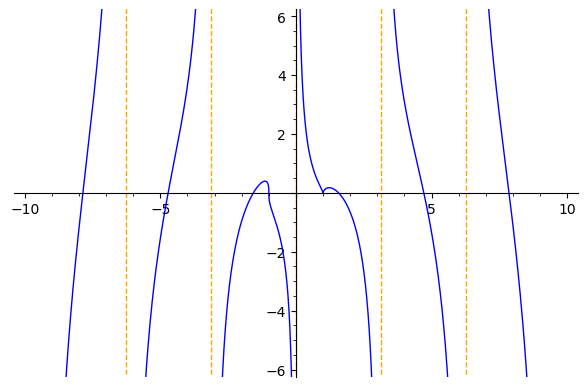

In [11]:
v1 = line([(-pi, -10), (-pi, 10)], color = "orange", linestyle = '--', thickness = 1)
v2 = line([(0, -10), (0, 10)], color = "orange", linestyle = '--', thickness = 1)
v3 = line([(pi, -10), (pi, 10)], color = "orange", linestyle = '--', thickness = 1)
v4 = line([(-2 * pi, -10), (-2 * pi, 10)], color = "orange", linestyle = '--', thickness = 1)
v5 = line([(2 * pi, -10), (2 * pi, 10)], color = "orange", linestyle = '--', thickness = 1)
show(graph + v1 + v2 + v3 + v4 + v5, xmin = -10, xmax = 10, ymin = -6, ymax = 6)